#Outlier Analisys and Vizualization

###Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

###Creating a function that transforms data into a data frame compatible for plotting for outliers

In [2]:
def load_database(df, indicator_field, indicator_names, year_start_index, year_end_index):
    result = pd.DataFrame()
    for indicator_name in indicator_names:
        column_range = pd.Index(['Country Name']).append(df.columns[year_start_index:year_end_index]).array
        indicator_df = df.loc[df[indicator_field] == indicator_name, column_range]
        ind_values = pd.DataFrame()
        for row in indicator_df.itertuples():
            row_id = row[0]
            country = row[1]
            row = row[2:]
            prev_value = None
            for value in row:
                if not pd.isna(prev_value) and prev_value != 0 and not pd.isna(value):
                    percent_inc = (value - prev_value) / abs(prev_value) * 100
                    difference = value - prev_value
                    df_row = {'Id': row_id, 'Country Name': country, 'Previous': prev_value,
                              'Current': value, 'Increase': difference, 'Percentage Inc': percent_inc}
                    ind_values = ind_values.append(df_row, ignore_index=True)
                    prev_value = value
                else:
                    df_row = {'Id': row_id, 'Country Name': country, 'Previous': prev_value,
                              'Current': value, 'Increase': None, 'Percentage Inc': None}
                    ind_values = ind_values.append(df_row, ignore_index=True)
                    prev_value = value
        result = result.append({'Indicator': indicator_name, 'DF': ind_values}, ignore_index=True)
    return result

###Loading data from csv files into data frames

In [3]:
df_sea = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects/'
                                         'SustainableEnergyAndHealth/data/'
                                         'Sustainable_Energy_for_All_Transformed.csv',
                      header=0,
                      na_values=['..'])
df_esg = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects'
                                        '/SustainableEnergyAndHealth/data'
                                        '/Environment_Social_and_Governance_(ESG)_Data.csv',
                      header=0,
                      na_values=['..'])
df_sdg = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects'
                                        '/SustainableEnergyAndHealth/data'
                                        '/Sustainable_Development_Goals_(SDGs).csv',
                      header=0,
                      na_values=['..'])
df_hnp = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects'
                                        '/SustainableEnergyAndHealth/data'
                                        '/Health_Nutrition_and_Population_Statistics.csv',
                      header=0,
                      na_values=['..'])

###Transforming all data frames into compatible data frames and concatenation

In [4]:
df = df_sea
indicator_field = "Indicator"
indicator_names = df[indicator_field].unique()
year_start_index = 17

year_end_index = 29

df_sea_out = load_database(df, indicator_field, indicator_names, year_start_index, year_end_index)
df_esg_out = load_database(df_esg, "Series Name", df_esg['Series Name'].unique(), 4, 15)
df_sdg_out = load_database(df_sdg, "Series Name", df_sdg['Series Name'].unique(), 4, 15)
df_hnp_out = load_database(df_hnp, "Series Name", df_hnp['Series Name'].unique(), 4, 15)

database = df_sea_out.append(df_esg_out, ignore_index=True)\
    .append(df_sdg_out, ignore_index=True)\
    .append(df_hnp_out, ignore_index=True)

###Vizual representation for outlier analisys

Indicator: Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]
[Increase]Description of Indicator: 
count     2046.0
unique     727.0
top          0.0
freq       428.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     2046.0
unique    1604.0
top          0.0
freq       428.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


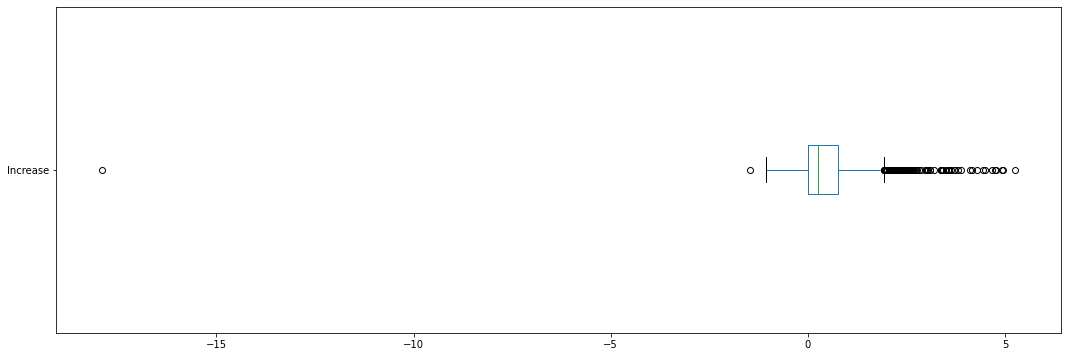

[Percentage Increase] Box Plot:


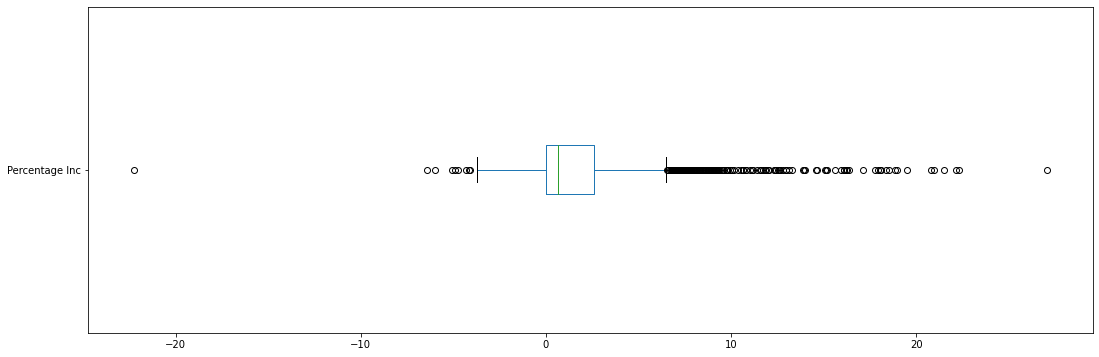

[Increase] Density Plot:


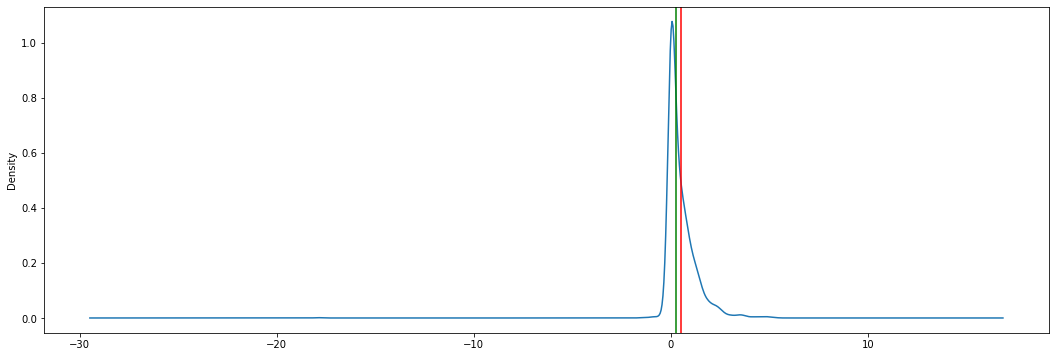

[Percentage Increase] Density Plot:


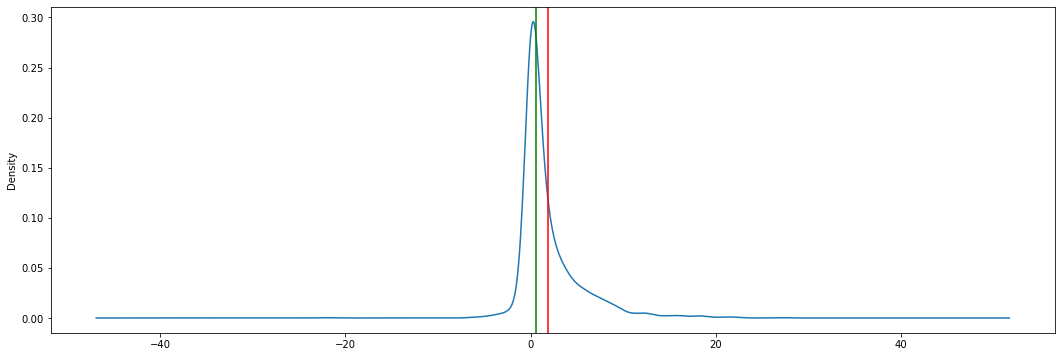



------------------------------------------------------------------


Indicator: Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]
[Increase]Description of Indicator: 
count     1990.0
unique    1351.0
top          0.0
freq       635.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1990.0
unique    1354.0
top          0.0
freq       635.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


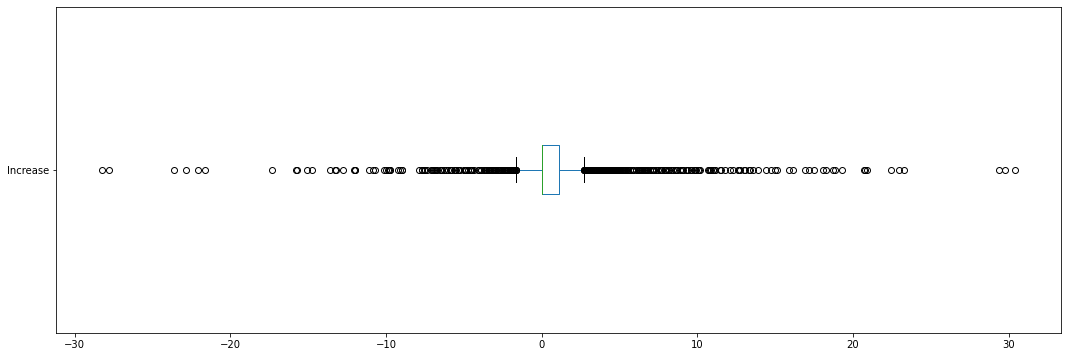

[Percentage Increase] Box Plot:


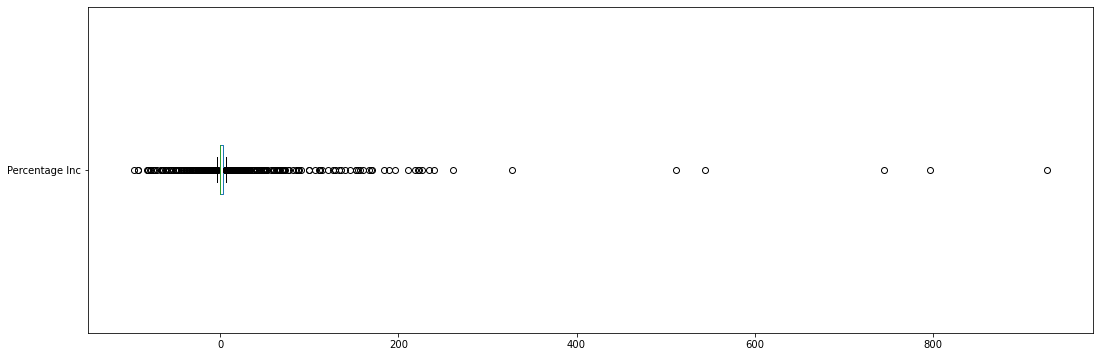

[Increase] Density Plot:


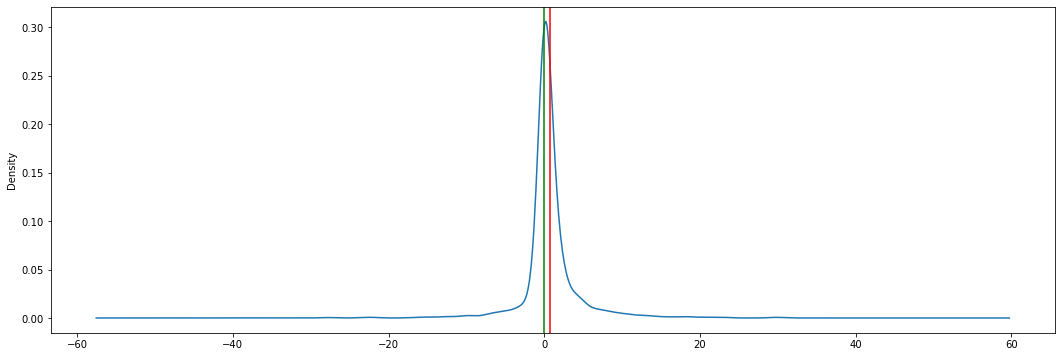

[Percentage Increase] Density Plot:


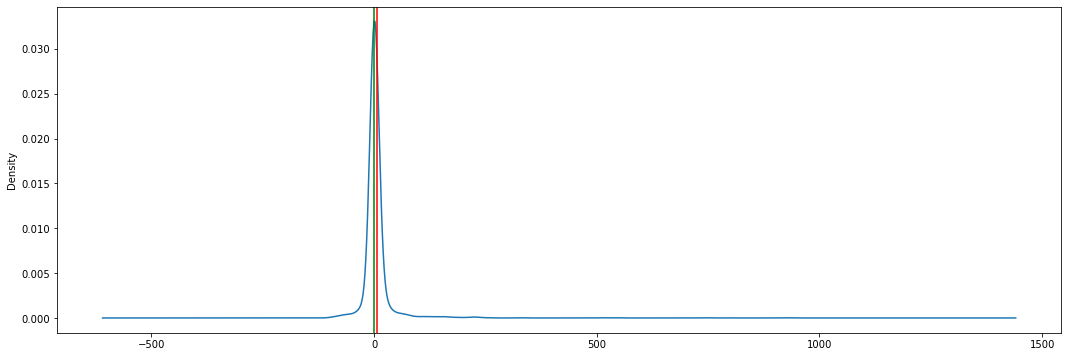



------------------------------------------------------------------


Indicator: Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]
[Increase]Description of Indicator: 
count     2088.0
unique    1433.0
top          0.0
freq       637.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     2088.0
unique    1449.0
top          0.0
freq       637.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


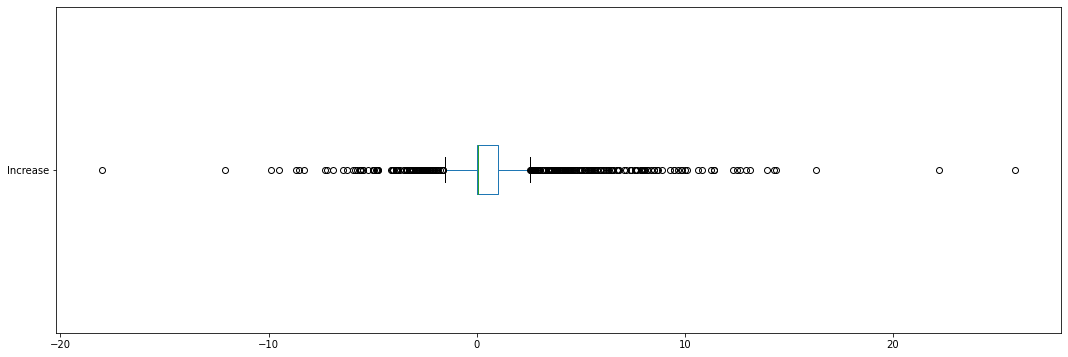

[Percentage Increase] Box Plot:


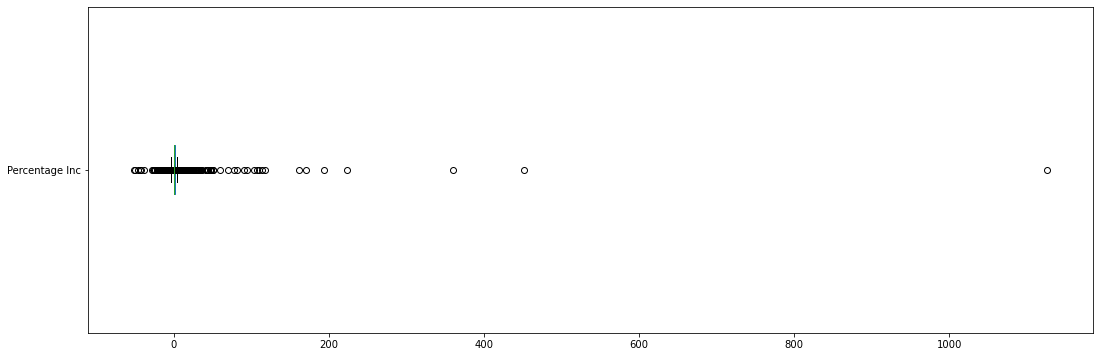

[Increase] Density Plot:


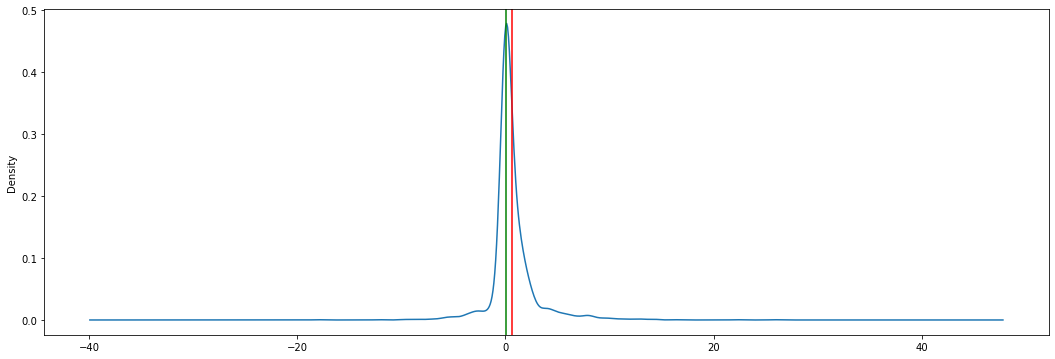

[Percentage Increase] Density Plot:


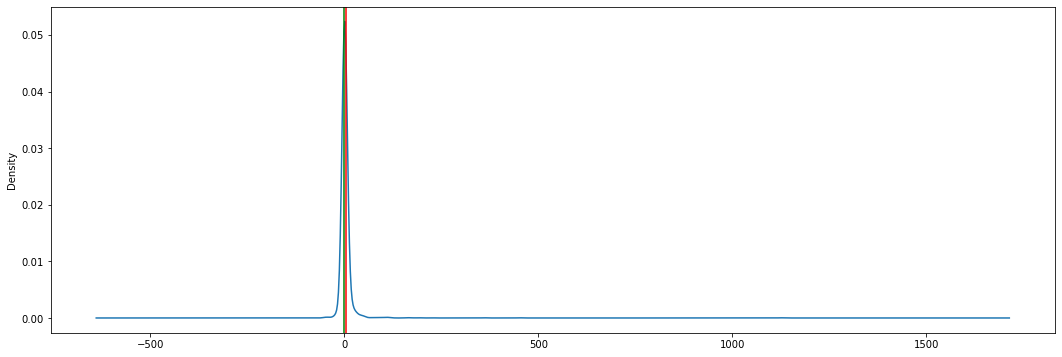



------------------------------------------------------------------


Indicator: Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
[Increase]Description of Indicator: 
count     2088.0
unique    1399.0
top          0.0
freq       684.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     2088.0
unique    1405.0
top          0.0
freq       684.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


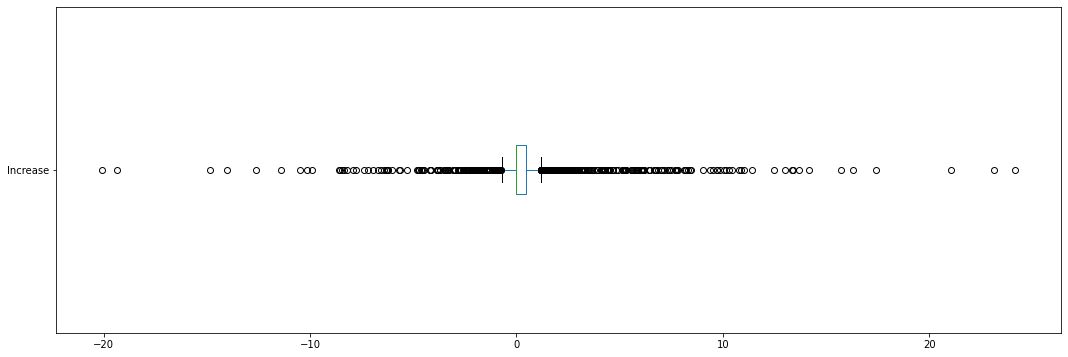

[Percentage Increase] Box Plot:


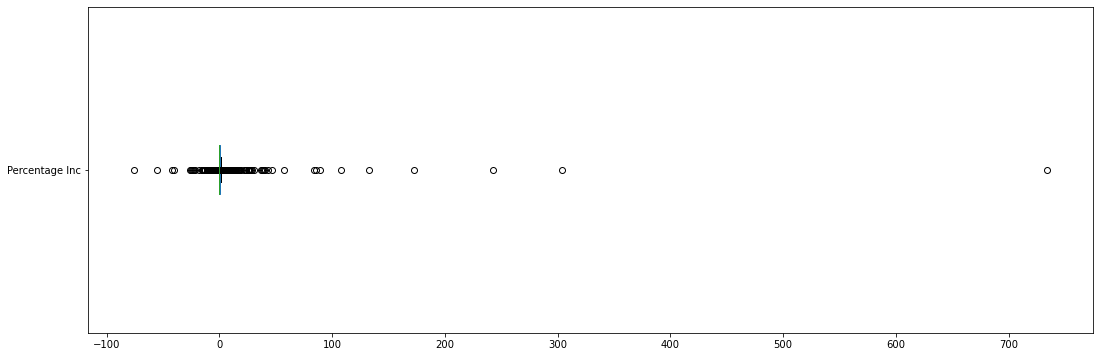

[Increase] Density Plot:


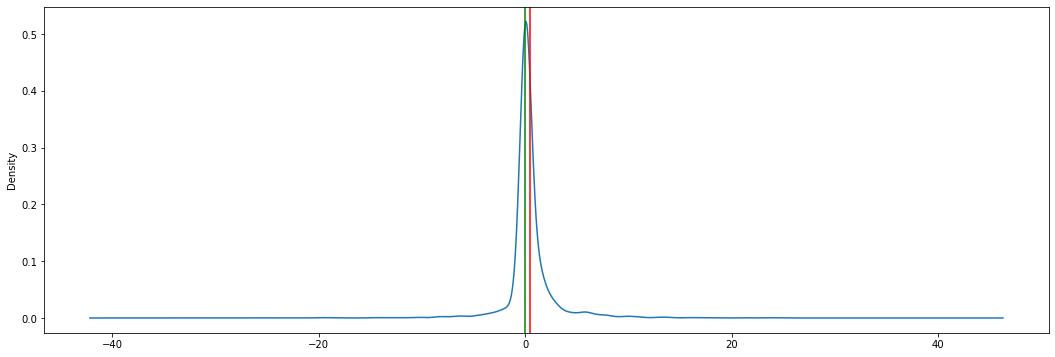

[Percentage Increase] Density Plot:


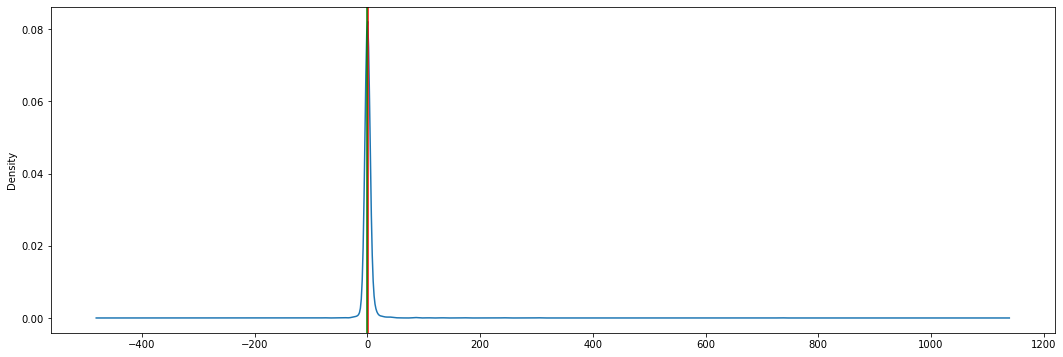



------------------------------------------------------------------


Indicator: Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]
[Increase]Description of Indicator: 
count     1841.00000
unique    1841.00000
top         -1.64816
freq         1.00000
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1841.000000
unique    1841.000000
top         -1.025558
freq         1.000000
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


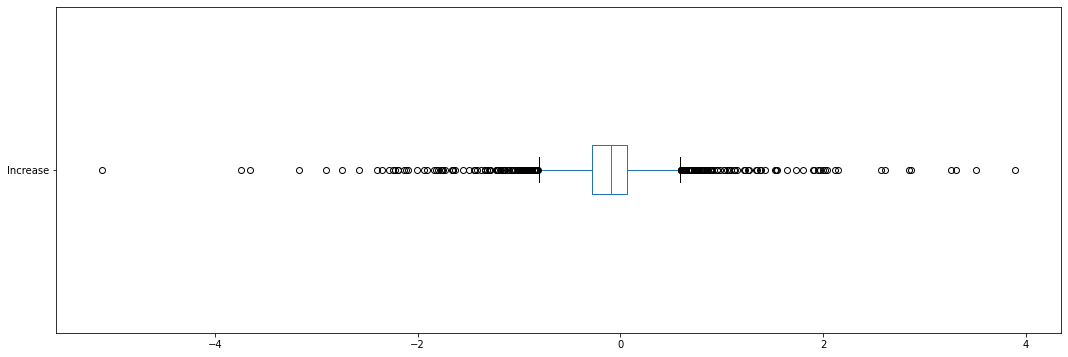

[Percentage Increase] Box Plot:


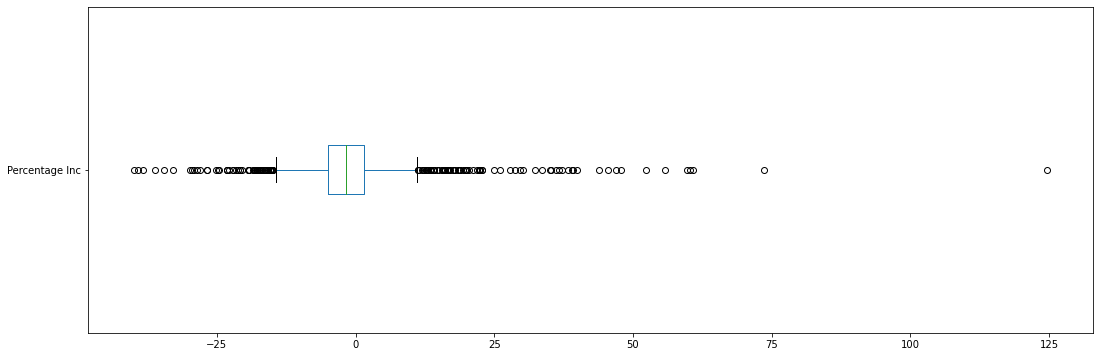

[Increase] Density Plot:


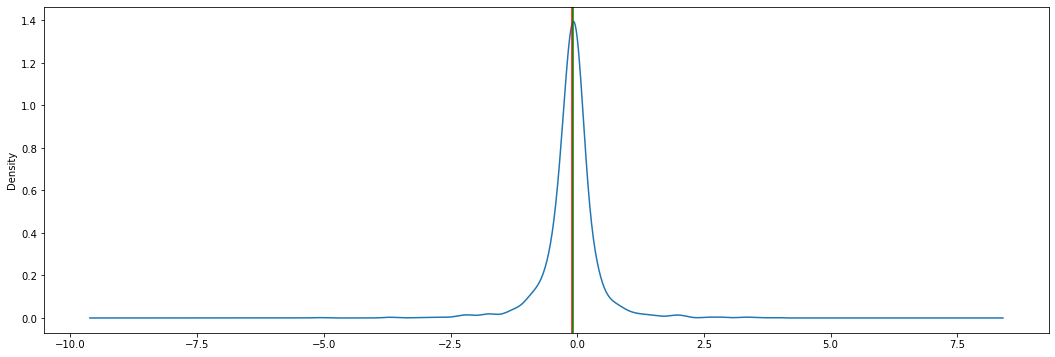

[Percentage Increase] Density Plot:


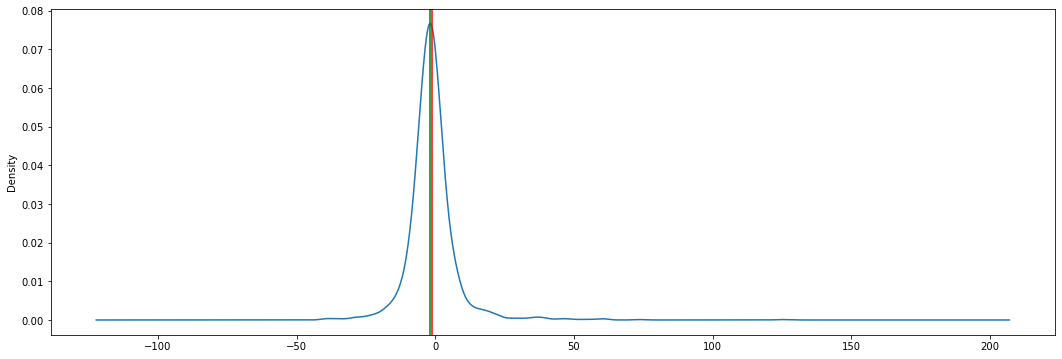



------------------------------------------------------------------


Indicator: Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]
[Increase]Description of Indicator: 
count     1529.0
unique    1176.0
top          0.0
freq        70.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1529.0
unique    1450.0
top          0.0
freq        70.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


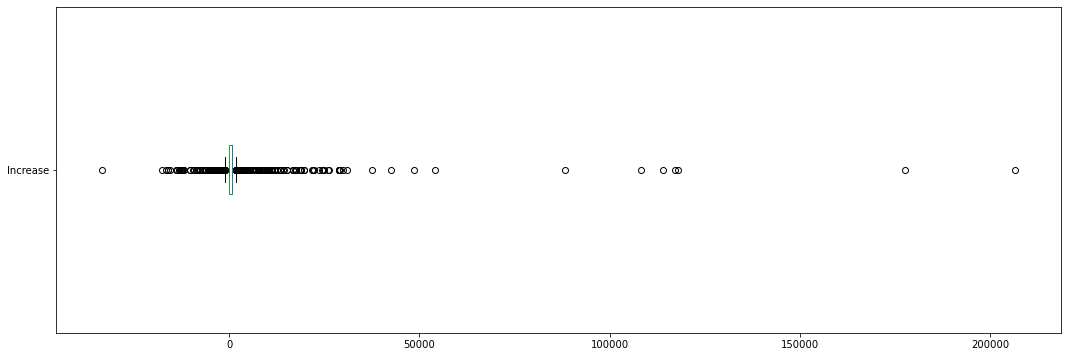

[Percentage Increase] Box Plot:


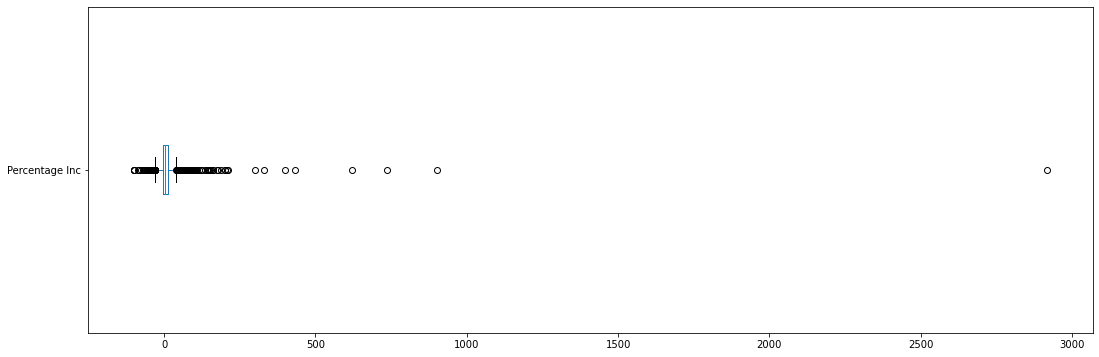

[Increase] Density Plot:


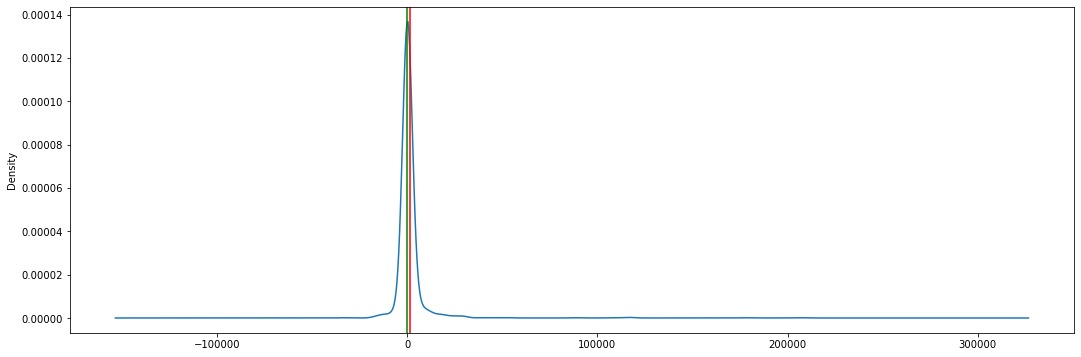

[Percentage Increase] Density Plot:


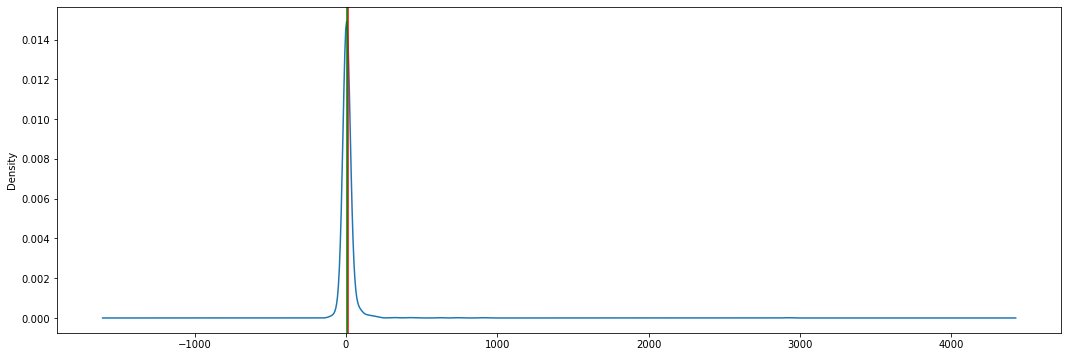



------------------------------------------------------------------


Indicator: Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]
[Increase]Description of Indicator: 
count     1529.0
unique    1497.0
top          0.0
freq        33.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1529.0
unique    1494.0
top          0.0
freq        33.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


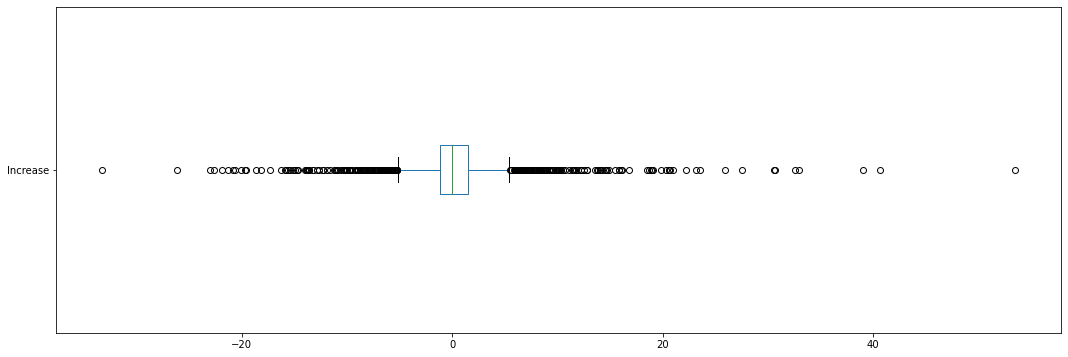

[Percentage Increase] Box Plot:


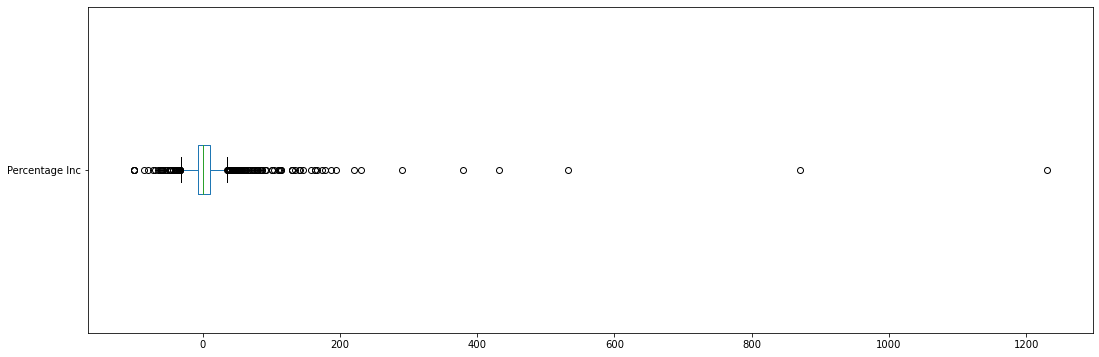

[Increase] Density Plot:


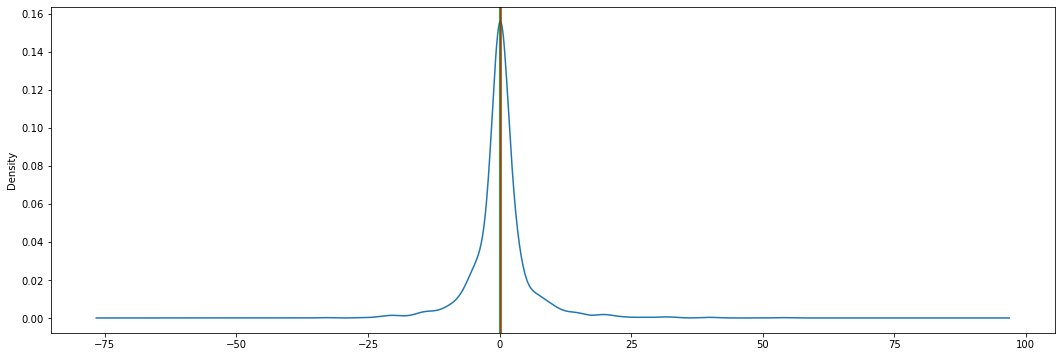

[Percentage Increase] Density Plot:


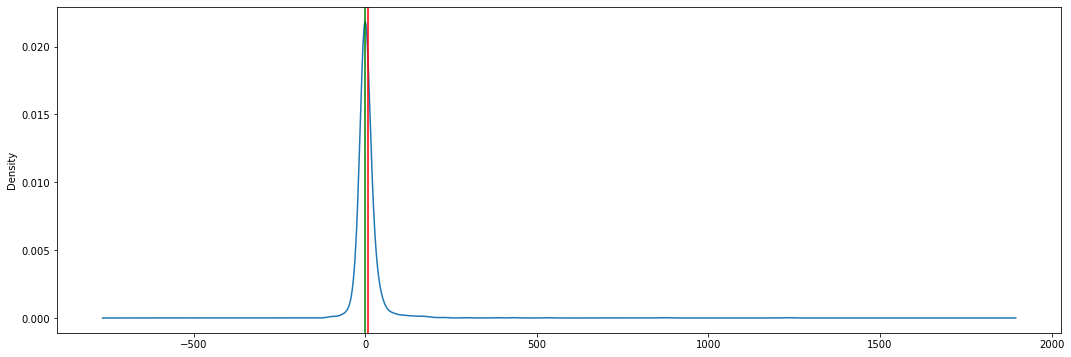



------------------------------------------------------------------


Indicator: Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]
[Increase]Description of Indicator: 
count     1794.0
unique    1764.0
top          0.0
freq        25.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1794.0
unique    1770.0
top          0.0
freq        25.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


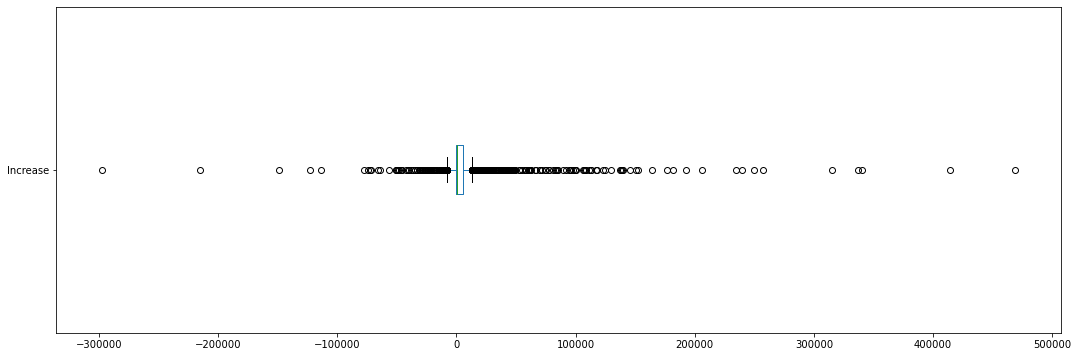

[Percentage Increase] Box Plot:


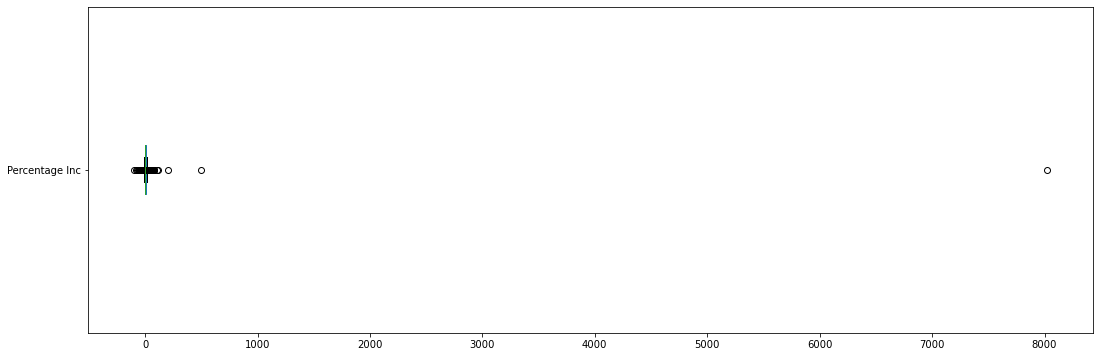

[Increase] Density Plot:


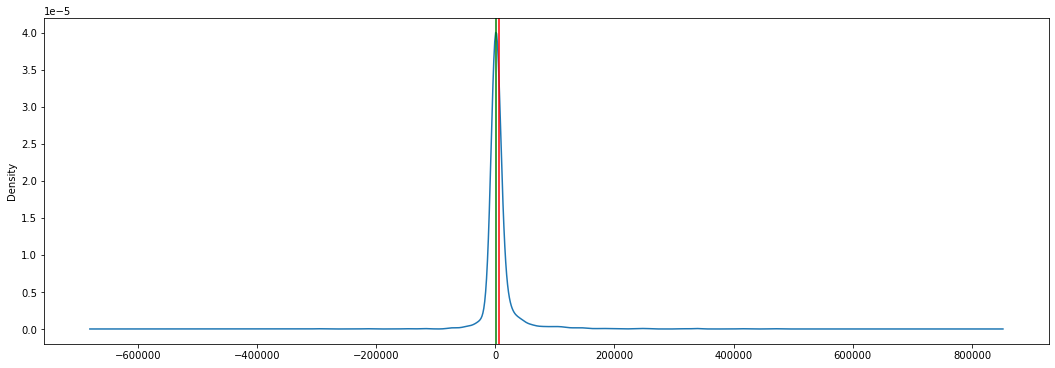

[Percentage Increase] Density Plot:


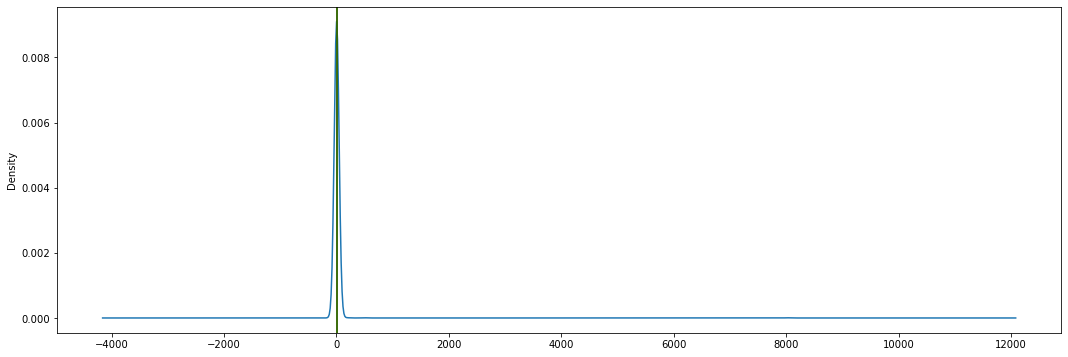



------------------------------------------------------------------


Indicator: Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]
[Increase]Description of Indicator: 
count     1794.00000
unique    1794.00000
top         -1.22925
freq         1.00000
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1794.000000
unique    1794.000000
top         -1.259357
freq         1.000000
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


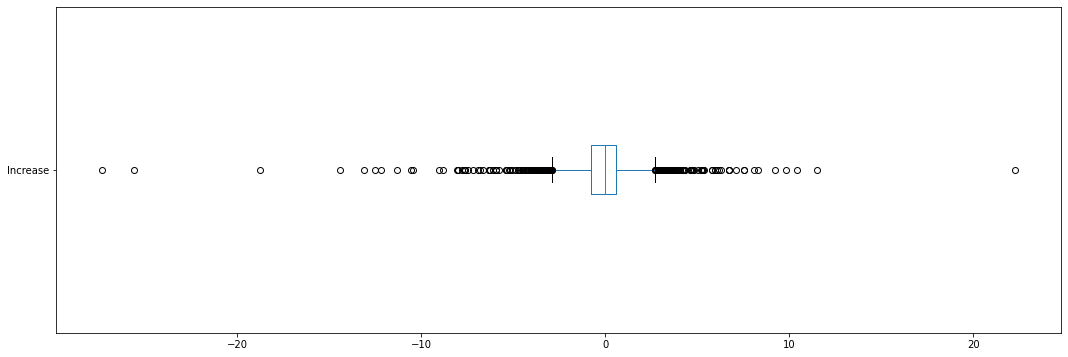

[Percentage Increase] Box Plot:


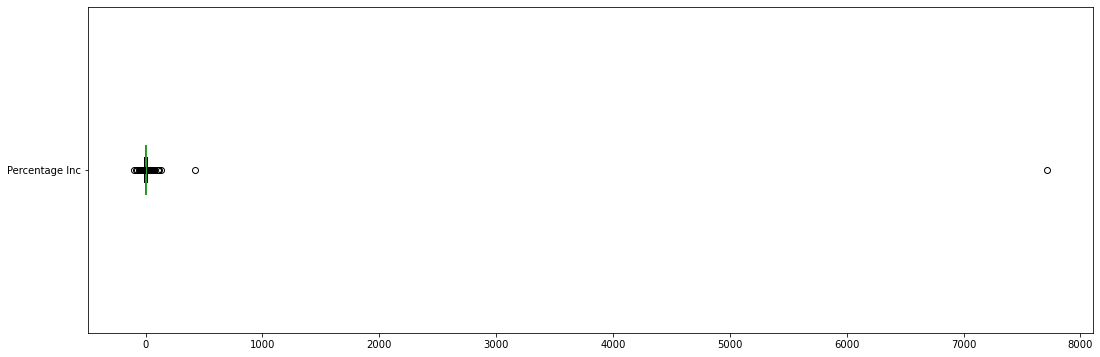

[Increase] Density Plot:


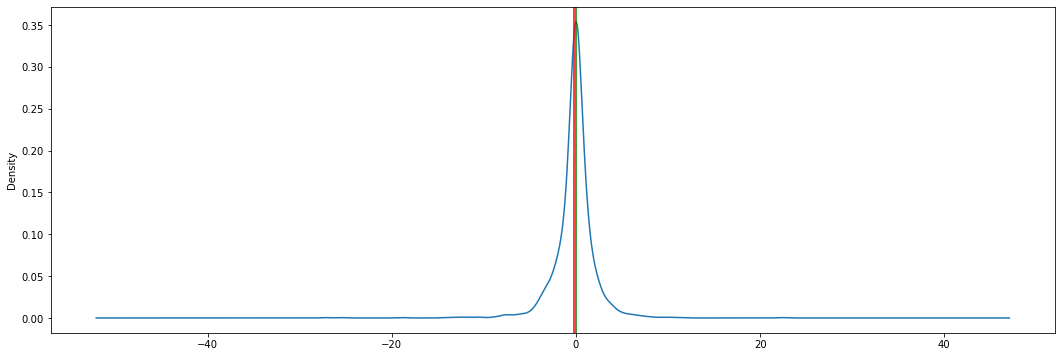

[Percentage Increase] Density Plot:


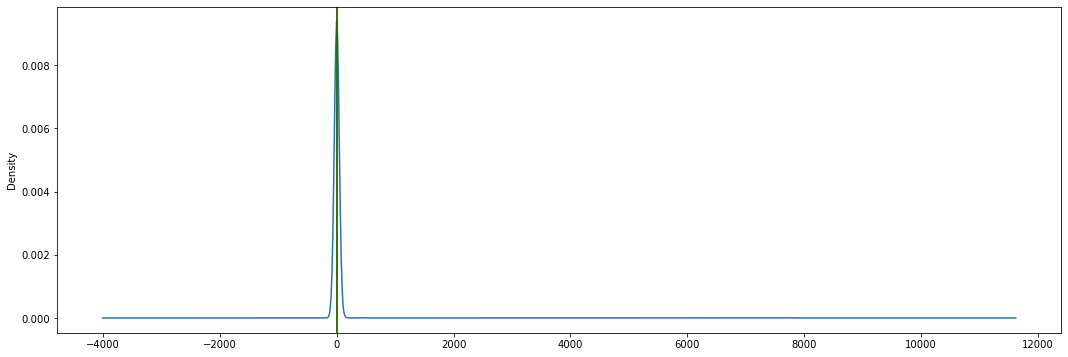



------------------------------------------------------------------


Indicator: Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]
[Increase]Description of Indicator: 
count     1871.0
unique    1569.0
top          0.0
freq        39.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1871.0
unique    1829.0
top          0.0
freq        39.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


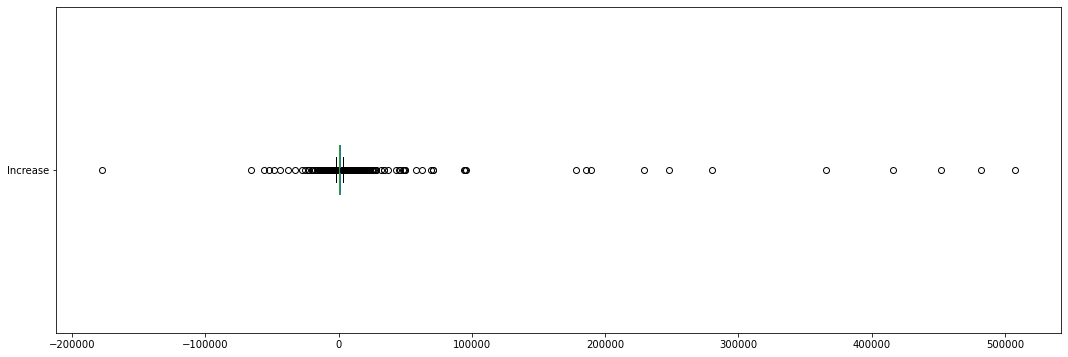

[Percentage Increase] Box Plot:


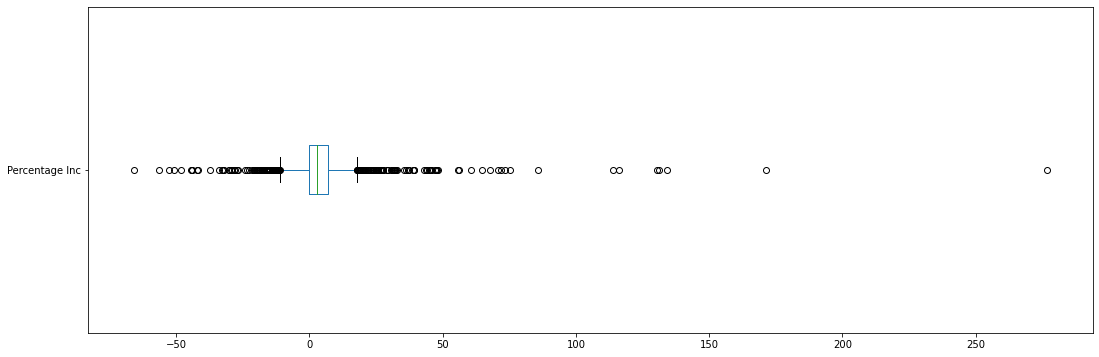

[Increase] Density Plot:


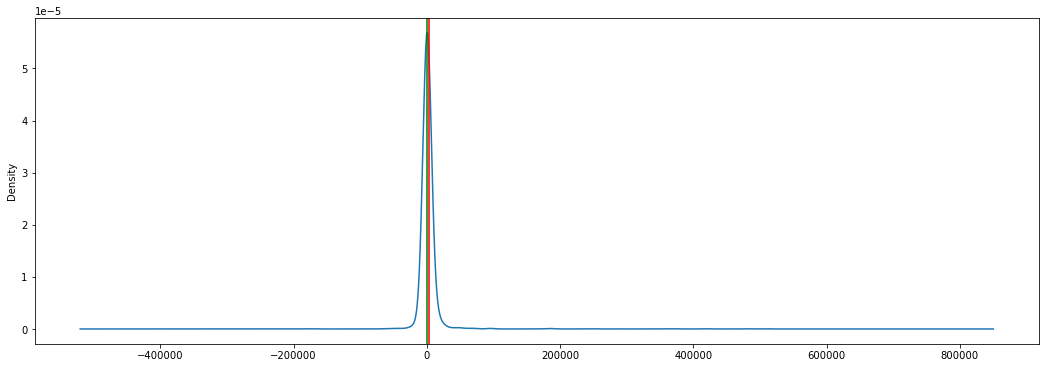

[Percentage Increase] Density Plot:


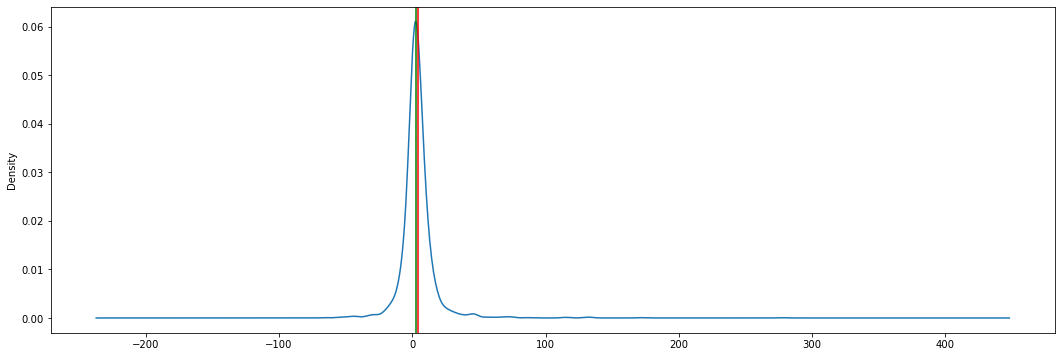



------------------------------------------------------------------


Indicator: Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
[Increase]Description of Indicator: 
count     1871.0
unique    1870.0
top          0.0
freq         2.0
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1871.0
unique    1870.0
top          0.0
freq         2.0
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


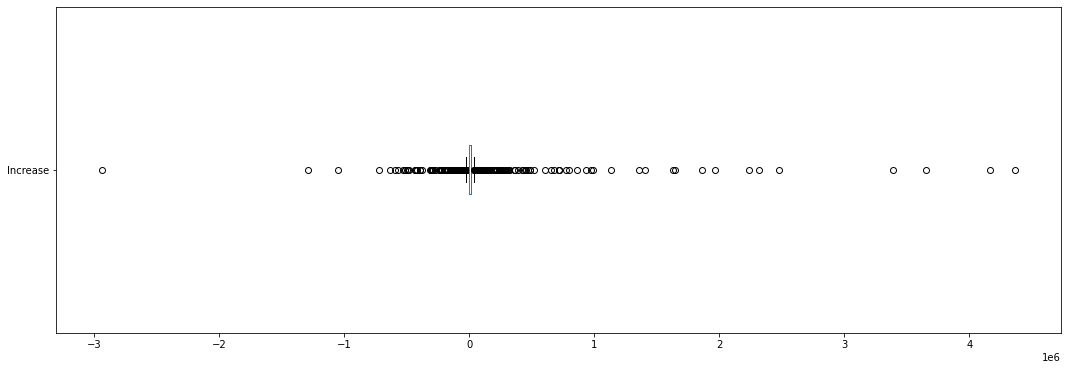

[Percentage Increase] Box Plot:


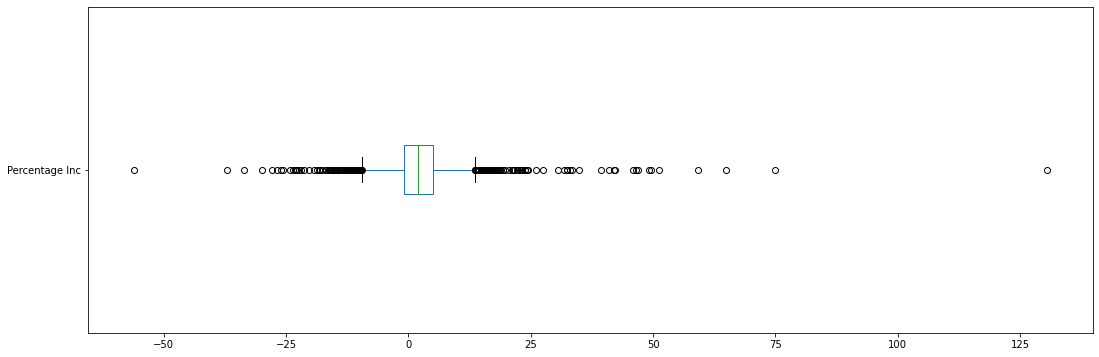

[Increase] Density Plot:


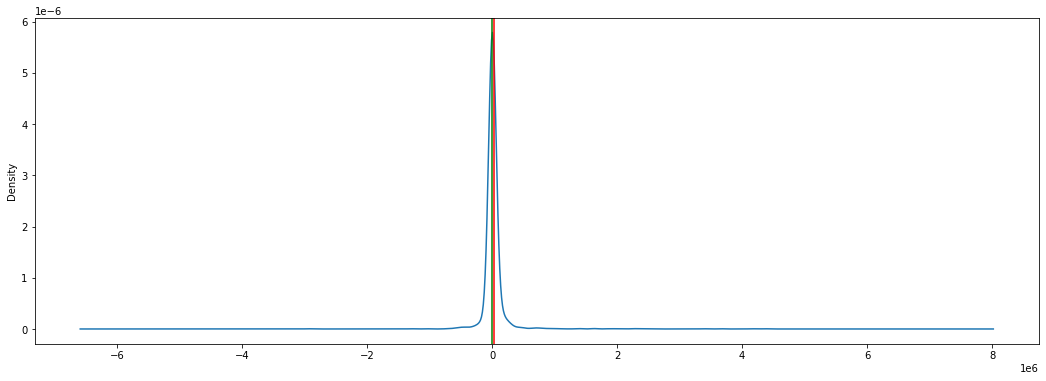

[Percentage Increase] Density Plot:


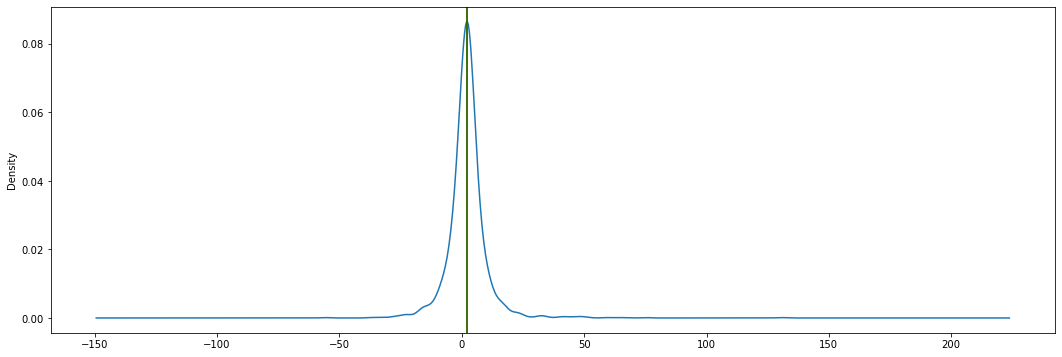



------------------------------------------------------------------


Indicator: CO2 emissions (metric tons per capita)
[Increase]Description of Indicator: 
count     2352.000000
unique    2338.000000
top          0.050086
freq         2.000000
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     2352.000000
unique    2338.000000
top         -6.661163
freq         2.000000
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


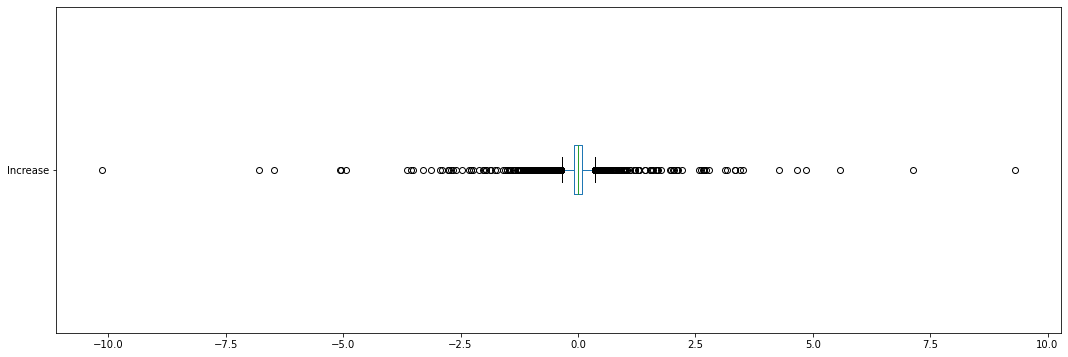

[Percentage Increase] Box Plot:


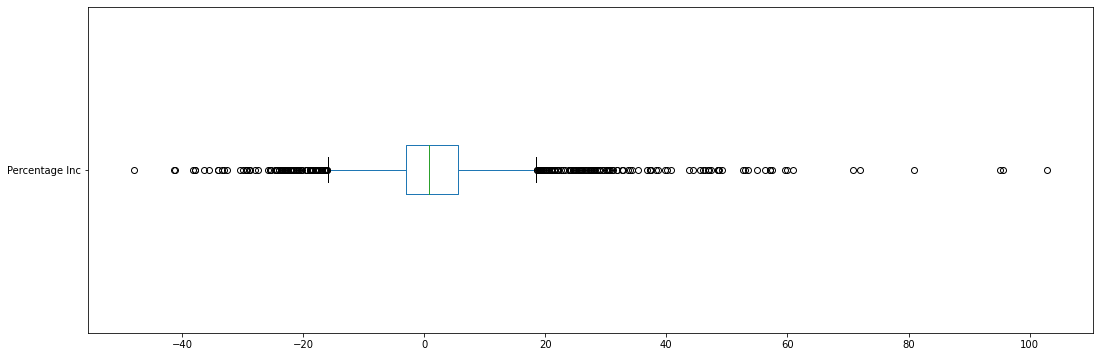

[Increase] Density Plot:


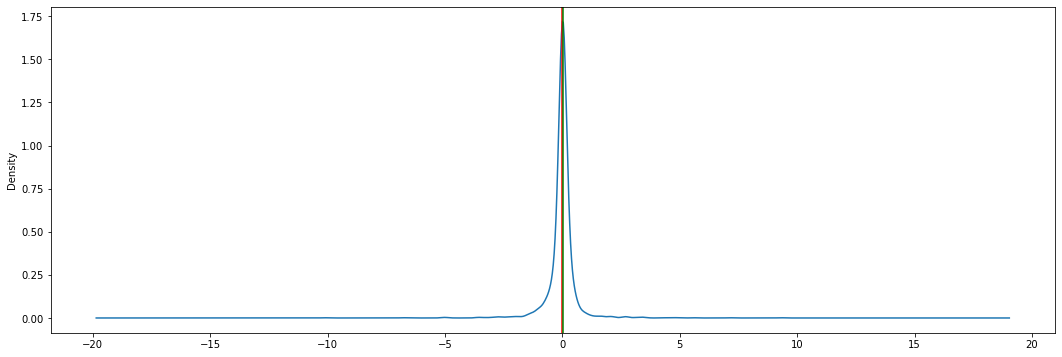

[Percentage Increase] Density Plot:


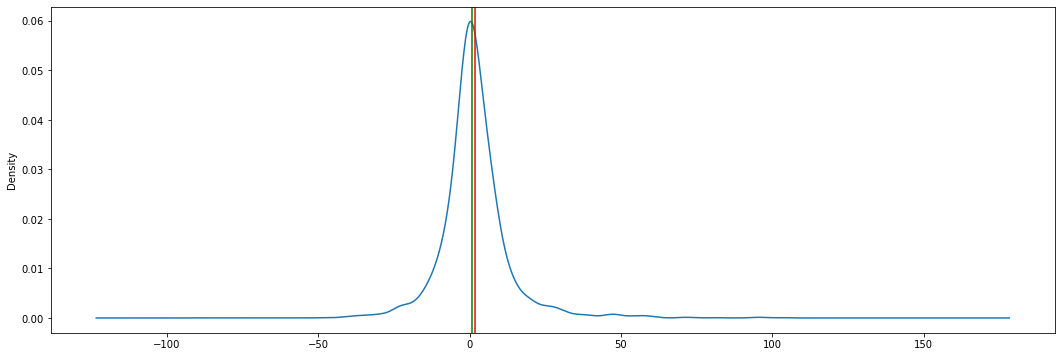



------------------------------------------------------------------


Indicator: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
[Increase]Description of Indicator: 
count     1160.000000
unique    1152.000000
top         -7.837803
freq         2.000000
Name: Increase, dtype: float64
[Percentage Increase]Description of Indicator: 
count     1160.000000
unique    1152.000000
top          1.572118
freq         2.000000
Name: Percentage Inc, dtype: float64
[Increase] Box Plot:


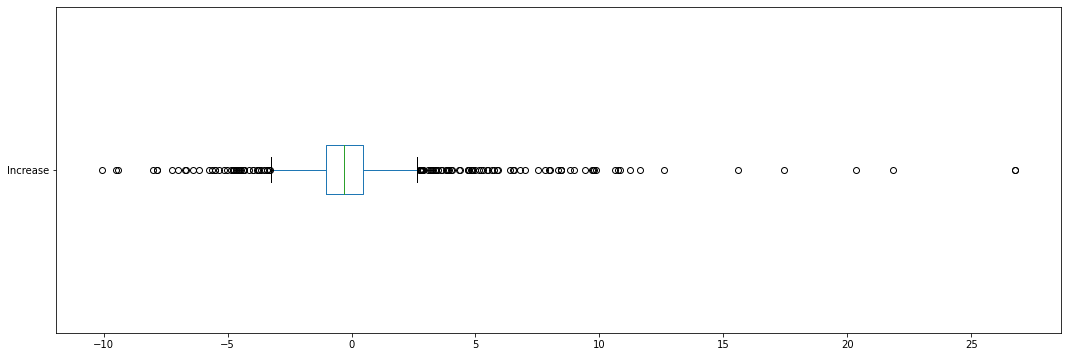

[Percentage Increase] Box Plot:


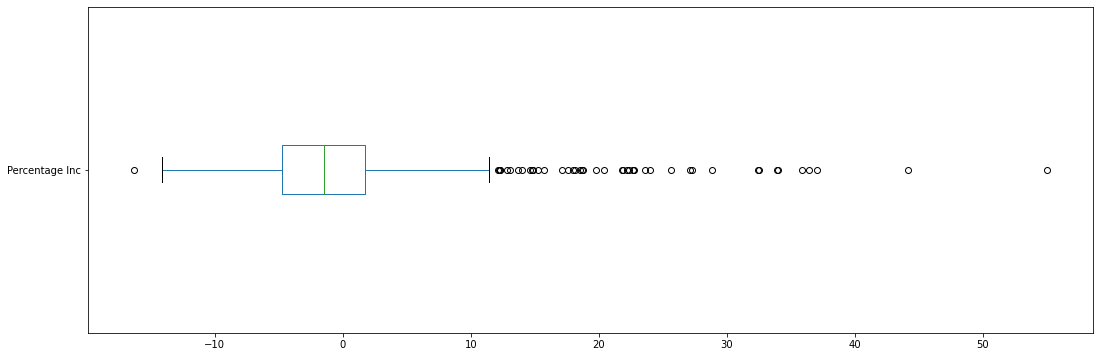

[Increase] Density Plot:


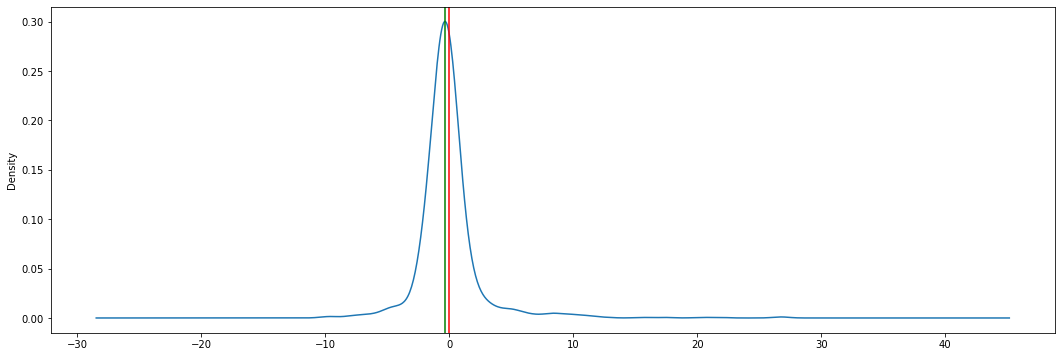

[Percentage Increase] Density Plot:


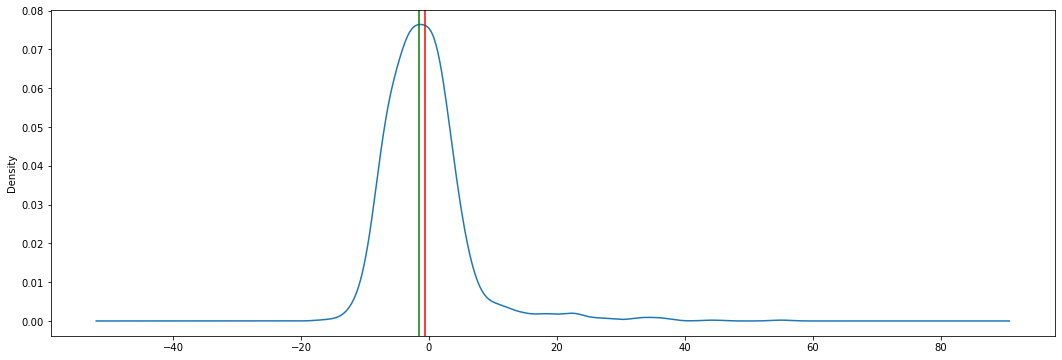



------------------------------------------------------------------


Indicator: nan
[Increase]Description of Indicator: 


KeyError: 'Increase'

In [10]:
for i in database.iterrows():
    indicator_name = i[1]["Indicator"]
    indicator_values = i[1]["DF"]
    if indicator_values is pd.DataFrame:
        continue
    print('Indicator: ' + str(indicator_name))
    print('\n')
    print('[Increase]Description of Indicator: ')
    print(indicator_values['Increase'].describe())
    print('\n')
    print('[Percentage Increase]Description of Indicator: ')
    print(indicator_values['Percentage Inc'].describe())
    print('\n')
    print('[Increase] Box Plot:')
    ax1 = indicator_values['Increase'].plot(kind='box', vert=False, figsize=(18, 6))
    plt.show()
    print('\n')
    print('[Percentage Increase] Box Plot:')
    ax1 = indicator_values['Percentage Inc'].plot(kind='box', vert=False, figsize=(18, 6))
    plt.show()
    print('\n')
    print('[Increase] Density Plot:')
    ax2 = indicator_values['Increase'].plot(kind='density', figsize=(18, 6))
    ax2.axvline(indicator_values['Increase'].mean(), color='red')
    ax2.axvline(indicator_values['Increase'].median(), color='green')
    plt.show()
    print('\n')
    print('[Percentage Increase] Density Plot:')
    ax2 = indicator_values['Percentage Inc'].plot(kind='density', figsize=(18, 6))
    ax2.axvline(indicator_values['Percentage Inc'].mean(), color='red')
    ax2.axvline(indicator_values['Percentage Inc'].median(), color='green')
    plt.show()
    print('\n')
    print('------------------------------------------------------------------')
    print('\n')